In [104]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Task 1

In [105]:
def func(x, a):
    return (
        a *1/x* np.cos(x**2))

In [106]:
data = xr.DataArray(data=0, coords={"x":np.linspace(1, 10,100)}, dims=["x"])
data = func(data.x, 5)

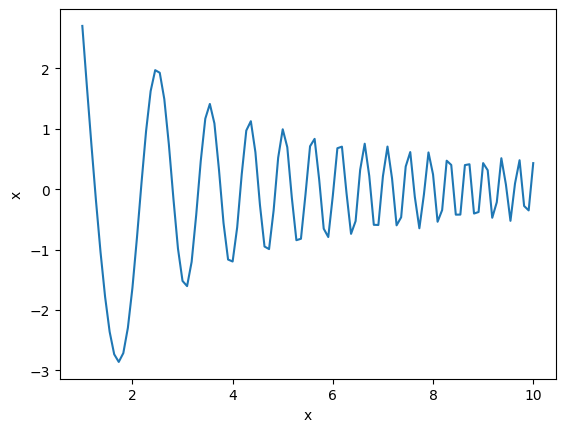

In [107]:
plt.figure()
data.plot()
plt.show()

In [108]:
data_noise = xr.DataArray(data=0, coords={"x":np.linspace(1, 10,100)}, dims=["x"])
data_noise = func(data.x, 5) + np.random.normal(0, 0.2, 100)

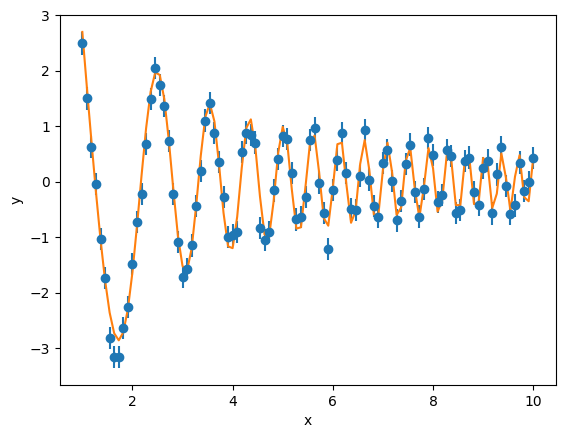

In [109]:
plt.figure()
plt.errorbar(data_noise.x, data_noise, 0.2, marker="o", linestyle="")
data.plot()
plt.ylabel("y")
plt.show()

In [110]:
def chi2(x, mu, sigma):
    res = (x-mu)/sigma
    return (res**2).sum()

In [111]:
chi2_full = chi2(data_noise, data, 0.2)
print(chi2_full.data)
chi2_red = chi2_full/100
print(chi2_red.data)

91.36303898137221
0.9136303898137221


In [112]:
chi2_full = chi2(data_noise, data, 2)
print(chi2_full.data)
chi2_red = chi2_full/100
print(chi2_red.data)

0.9136303898137222
0.009136303898137223


In [113]:
chi2_full = chi2(data_noise, data, .02)
print(chi2_full.data)
chi2_red = chi2_full/100
print(chi2_red.data)

9136.303898137223
91.36303898137223


In [114]:
chi2_full = chi2(data, data, 0.2)
print(chi2_full.data)
chi2_red = chi2_full/100
print(chi2_red.data)

0.0
0.0


In [115]:
res = []
data_noise = xr.DataArray(data=0, coords={"x":np.linspace(1, 10,100)}, dims=["x"])
data = xr.DataArray(data=0, coords={"x":np.linspace(1, 10,100)}, dims=["x"])
data = func(data.x, 5)
for i in range(1000):
    data_noise = func(data.x, 5) + np.random.normal(0, 0.2, 100)
    res.append(chi2(data_noise, data, 0.2).data)

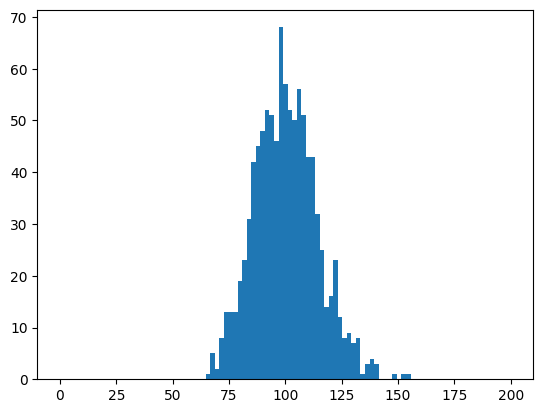

In [116]:
plt.figure()
plt.hist(res, np.linspace(0, 200, 100));

# Task 2

In [117]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

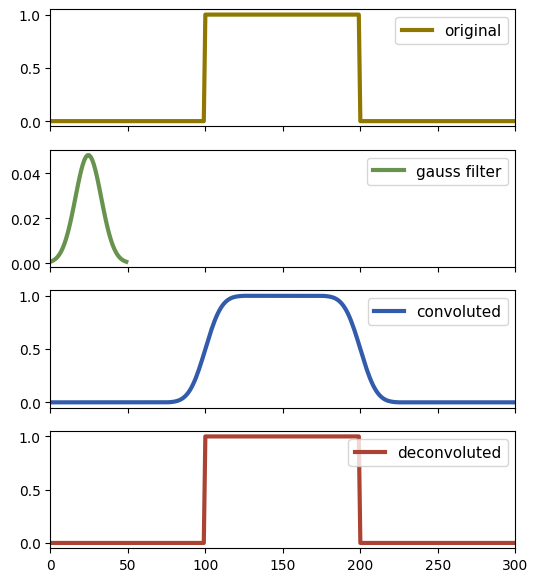

In [118]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# let the signal be box-like
signal = np.repeat([0., 1., 0.], 100)
# and use a gaussian filter
gauss = gaussian(np.linspace(0, 50,50), 25, 12/np.sqrt(2))
gauss = gauss/gauss.sum()

# calculate the convolution (np.convolve and scipy.signal.convolve identical)
# the keywordargument mode="same" ensures that the convolution spans the same
#   shape as the input array.
#filtered = scipy.signal.convolve(signal, gauss, mode='same') 
filtered = np.convolve(signal, gauss, mode='same')

#filtered_noise = np.convolve(signal, gauss, mode='same') +np.random.normal(0, 0.0001, len(signal))

#filtered_smoothed = savgol_filter(filtered_noise, 51, 3)

deconv,  _ = scipy.signal.deconvolve( filtered, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = int((len(signal)-n)/2)
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    #ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.show()  

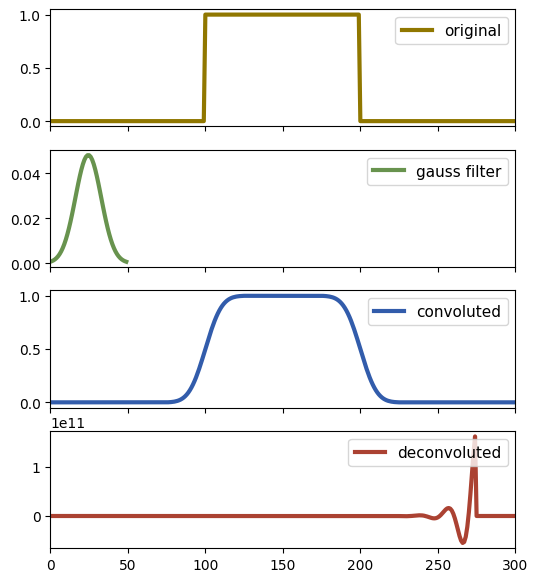

In [119]:
filtered_noise = np.convolve(signal, gauss, mode='same') +np.random.normal(0, 0.00001, len(signal))

deconv,  _ = scipy.signal.deconvolve( filtered_noise, gauss )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss)+1
# so we need to expand it by 
s = int((len(signal)-n)/2)
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    #ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.show()  


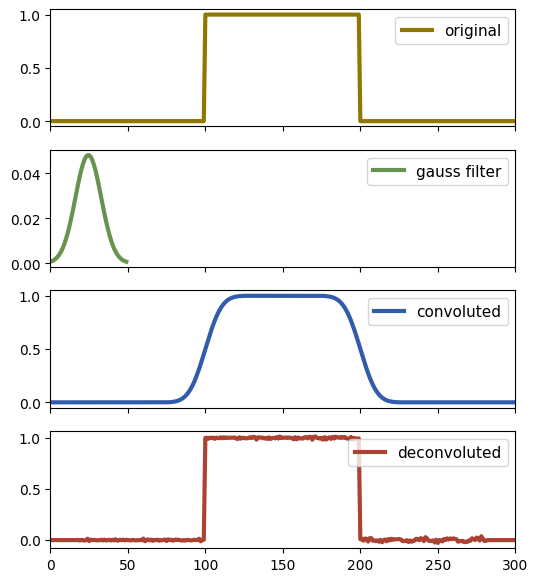

In [120]:
gauss_cut = gauss[gauss>gauss.max()*0.1]
filtered_noise = np.convolve(signal, gauss_cut, mode='same') +np.random.normal(0, 0.00001, len(signal))
deconv,  _ = scipy.signal.deconvolve( filtered_noise, gauss_cut )
#the deconvolution has n = len(signal) - len(gauss) + 1 points
n = len(signal)-len(gauss_cut)+1
# so we need to expand it by 
s = int((len(signal)-n)/2)
#on both sides.
deconv_res = np.zeros(len(signal))
deconv_res[s:len(signal)-s-1] = deconv
deconv = deconv_res
# now deconv contains the deconvolution 
# expanded to the original shape (filled with zeros) 


#### Plot #### 
fig , ax = plt.subplots(nrows=4, figsize=(6,7))

ax[0].plot(signal,            color="#907700", label="original",     lw=3 ) 
ax[1].plot(gauss,          color="#68934e", label="gauss filter", lw=3 )
# we need to divide by the sum of the filter window to get the convolution normalized to 1
ax[2].plot(filtered/np.sum(gauss), color="#325cab", label="convoluted" ,  lw=3 )
ax[3].plot(deconv,         color="#ab4232", label="deconvoluted", lw=3 ) 

for i in range(len(ax)):
    ax[i].set_xlim([0, len(signal)])
    #ax[i].set_ylim([-0.07, 1.2])
    ax[i].legend(loc=1, fontsize=11)
    if i != len(ax)-1 :
        ax[i].set_xticklabels([])

plt.show()  

# Task 3

In [121]:
signal = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
signal = np.sin(signal.x/10000*np.pi*2*100)

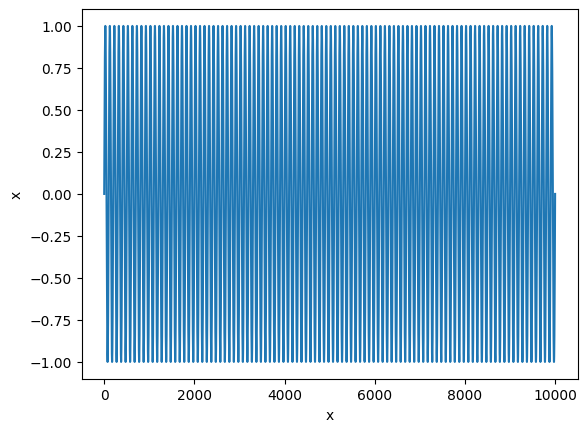

In [122]:
signal.plot()

In [123]:
signal.mean().data.item()

3.481659405224491e-17

In [124]:
signal2 = signal*signal

In [125]:
signal2.mean().data.item()

0.4999499999999996

In [126]:
signal1 = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
signal1 = np.sin(signal1.x/10000*np.pi*2*100)
signal2 = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
signal2 = np.sin(signal2.x/10000*np.pi*2*101)
(signal1*signal2).mean().data.item()

-4.092726157978177e-16

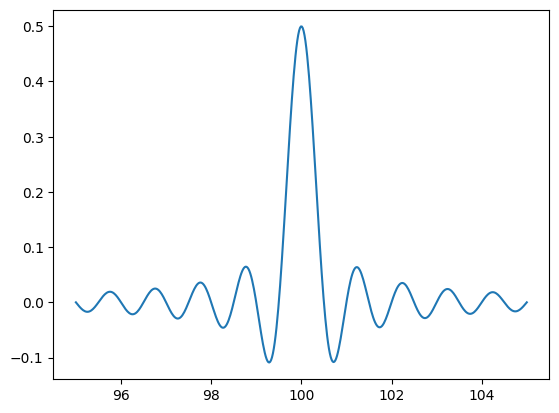

In [127]:
amplitudes = []
signal1 = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
signal1 = np.sin(signal1.x/10000*np.pi*2*100)
signal2 = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
for frequ in np.linspace(95, 105, 500):
    signal2 = np.sin(signal2.x/10000*np.pi*2*frequ)
    amplitudes.append((signal1*signal2).mean().data)

plt.plot(np.linspace(95, 105, 500), amplitudes);


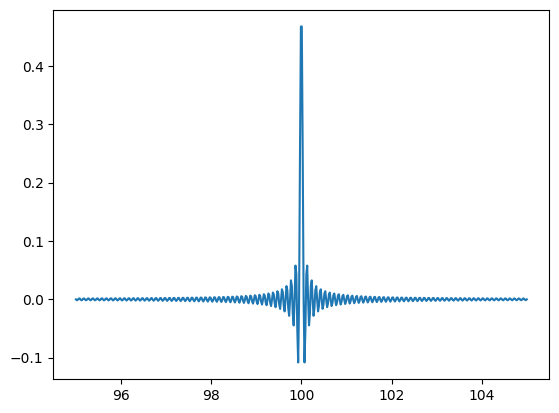

In [128]:
amplitudes = []
signal1 = xr.DataArray(data=0, coords={"x":np.linspace(0, 100000 ,10000)}, dims=["x"])
signal1 = np.sin(signal1.x/10000*np.pi*2*100)
signal2 = xr.DataArray(data=0, coords={"x":np.linspace(0, 100000 ,10000)}, dims=["x"])
for frequ in np.linspace(95, 105, 500):
    signal2 = np.sin(signal2.x/10000*np.pi*2*frequ)
    amplitudes.append((signal1*signal2).mean().data)

plt.plot(np.linspace(95, 105, 500), amplitudes);

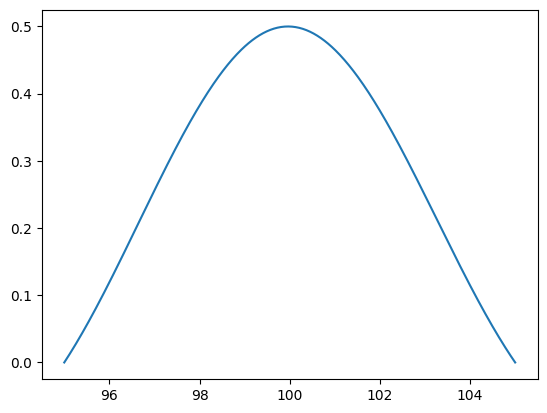

In [129]:
amplitudes = []
signal1 = xr.DataArray(data=0, coords={"x":np.linspace(0, 1000 ,10000)}, dims=["x"])
signal1 = np.sin(signal1.x/10000*np.pi*2*100)
signal2 = xr.DataArray(data=0, coords={"x":np.linspace(0, 1000 ,10000)}, dims=["x"])
for frequ in np.linspace(95, 105, 500):
    signal2 = np.sin(signal2.x/10000*np.pi*2*frequ)
    amplitudes.append((signal1*signal2).mean().data)

plt.plot(np.linspace(95, 105, 500), amplitudes);

In [130]:
signal1 = xr.DataArray(data=0, coords={"x":np.linspace(0, 1000 ,10000)}, dims=["x"])
signal1 = np.sin(signal1.x/10000*np.pi*2*100)
signal_noisy = xr.DataArray(data=0, coords={"x":np.linspace(0, 10000 ,10000)}, dims=["x"])
signal_noisy = np.sin(signal.x/10000*np.pi*2*100)*0.1 + np.random.normal(0, 1, 10000)

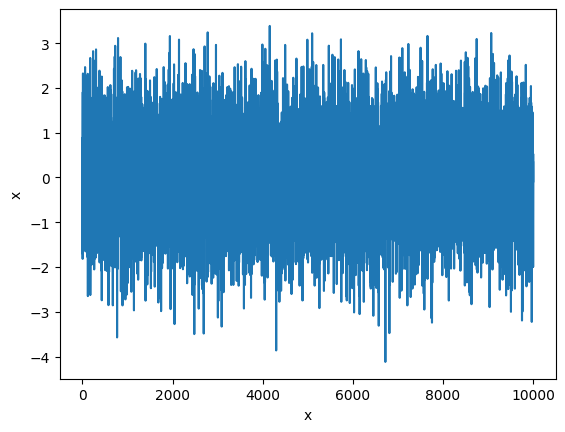

In [131]:
signal_noisy.plot();

In [132]:
(signal_noisy*signal1).mean().data.item()

0.051256528591217876

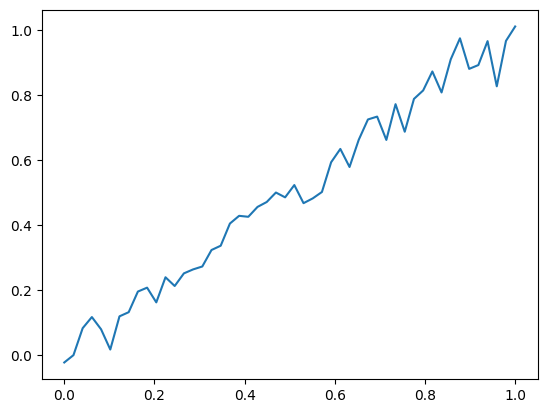

In [133]:
amplitudes = []
for amp in np.linspace(0, 1, 50):
    signal_noisy = np.sin(signal.x/10000*np.pi*2*100)*amp + np.random.normal(0, 1, 10000)
    amplitudes.append((signal_noisy*signal1).mean().data*2)

plt.plot(np.linspace(0, 1, 50), amplitudes);